<a href="https://colab.research.google.com/github/JavierPachas/ml_zoomcamp/blob/main/02_regression_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

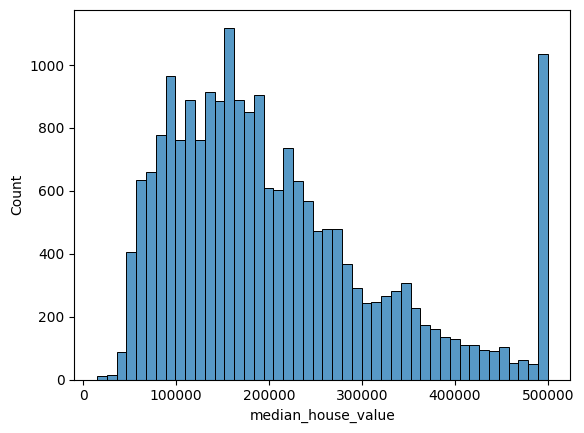

In [4]:
sns.histplot(data.median_house_value)

In [21]:
data = data[(data.ocean_proximity == '<1H OCEAN') | (data.ocean_proximity == 'INLAND')]

In [22]:
working_columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [23]:
data = data[working_columns]

In [24]:
data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


<Axes: xlabel='median_house_value', ylabel='Count'>

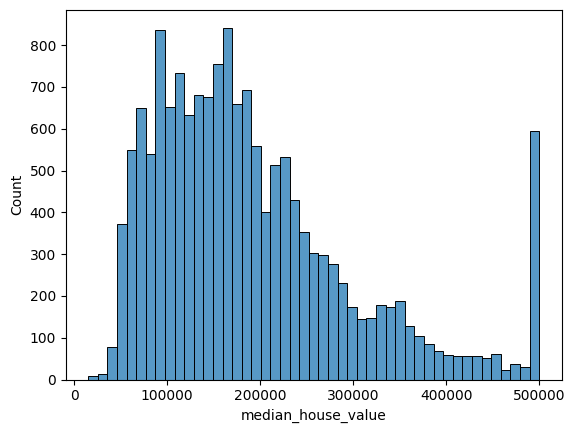

In [12]:
sns.histplot(data.median_house_value)

**Question 1**

In [25]:
data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Question 2**

In [26]:
np.median(data.population)

1195.0

**Question 3**

In [27]:
np.random.seed(42)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

In [31]:
y_train_origin = data_train.median_house_value.values
y_val_origin = data_val.median_house_value.values
y_test_origin = data_test.median_house_value.values

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

In [34]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [35]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Filling total_bedrooms with 0

In [103]:
X1 = data_train.fillna(0)

In [104]:
w_0, w = train_linear_regression(X1, y_train)

In [105]:
y_pred = w_0 + X1.dot(w)

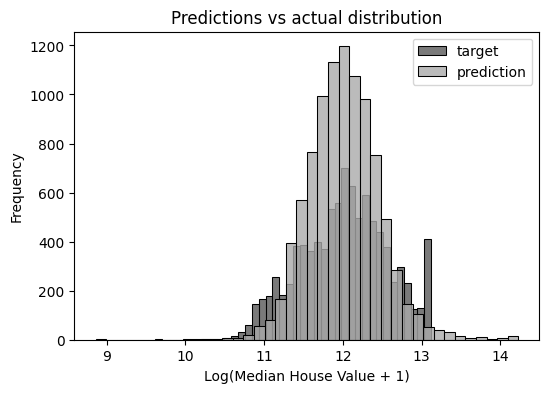

In [106]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Median House Value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [107]:
rmse(y_pred, y_train)

0.34027197158295347

In [108]:
X1_val = data_val.fillna(0)
y_pred = w_0 + X1_val.dot(w)

In [109]:
round(rmse(y_pred, y_val),2)

0.34

Filling total_bedrooms with mean

In [110]:
mean = np.mean(data_train.total_bedrooms)

In [111]:
X2 = data_train.fillna(mean)

In [112]:
w_0, w = train_linear_regression(X2, y_train)

In [113]:
y_pred = w_0 + X2.dot(w)

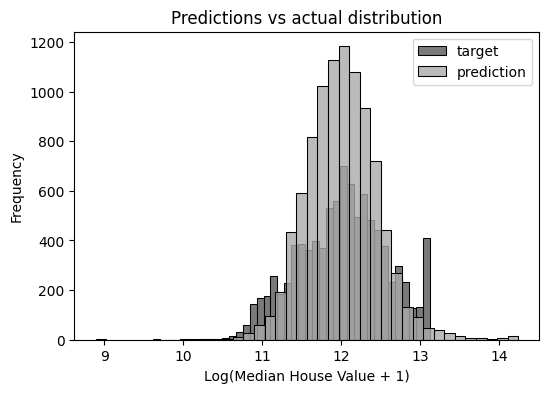

In [114]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Median House Value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [115]:
rmse(y_pred, y_train)

0.340030082226426

In [116]:
X2_val = data_val.fillna(mean)
y_pred = w_0 + X2_val.dot(w)

In [118]:
round(rmse(y_val, y_pred),2)

0.34

Both inputations on total_bedrooms work similar since both rmse are 0.34, however it makes more sense that houses have no zero bedrooms.

**Question 4**

In [119]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [134]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
score = []

for i in range(len(r)):
  w0, w = train_linear_regression_reg(data_train.fillna(0), y_train, r[i])
  X_val = data_val.fillna(0)
  y_pred = w_0 + X_val.dot(w)
  score.append(round(rmse(y_pred, y_val),2))



Text(0, 0.5, 'rmse')

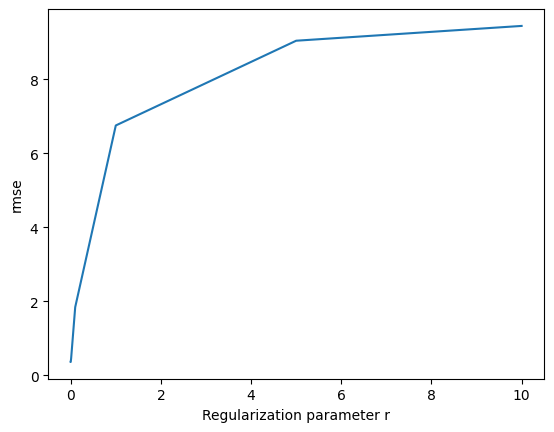

In [135]:
plt.plot(r,score)
plt.xlabel('Regularization parameter r')
plt.ylabel('rmse')

In [136]:
score

[0.36, 0.36, 0.36, 0.36, 0.46, 1.84, 6.75, 9.04, 9.44]

**Question 5**

In [150]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

In [151]:
for seed in seeds:
  np.random.seed(seed)

  n = len(data)

  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  data_shuffled = data.iloc[idx]

  data_train = data_shuffled.iloc[:n_train].copy()
  data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
  data_test = data_shuffled.iloc[n_train+n_val:].copy()

  y_train_origin = data_train.median_house_value.values
  y_val_origin = data_val.median_house_value.values
  y_test_origin = data_test.median_house_value.values

  y_train = np.log1p(data_train.median_house_value.values)
  y_val = np.log1p(data_val.median_house_value.values)
  y_test = np.log1p(data_test.median_house_value.values)

  del data_train['median_house_value']
  del data_val['median_house_value']
  del data_test['median_house_value']

  X_train = data_train.fillna(0).values
  w0, w = train_linear_regression(X_train, y_train)

  X_val = data_val.fillna(0)
  y_pred = w_0 + X_val.dot(w)

  scores.append(rmse(y_pred, y_val))

In [152]:
round(np.std(scores),3)

0.184

**Question 6**

In [176]:
np.random.seed(9)

X_new = pd.concat([data_train.fillna(0), data_val.fillna(0)], axis=0).values
y_new = pd.concat([pd.Series(y_train),pd.Series(y_val)], axis = 0)
w0, w = train_linear_regression_reg(X_new, y_new, r=0.001)


y_pred = w_0 + data_test.fillna(0).dot(w)

print(rmse(y_test, y_pred))

0.37106547694857783
